# EDA 

In this first part, we will look for patterns in the data and see how they characterize and explain whether or not the user will repay the loan.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from typing import Union

## 1 - Read data

In [2]:
df = pd.read_csv("../data/processed/df_loans_with_loans_repays_hist_and_trans_hist_per_user.csv")
print("DataFrame shape: ",df.shape)
print("DataFrame columns:",df.columns)
df.head()

DataFrame shape:  (6746, 79)
DataFrame columns: Index(['id', 'user_id', 'amount', 'total_amount', 'due_amount', 'due_date',
       'status', 'created_at', 'date_created', 'reference_date',
       'sum_amt_transactions_at_created_loan',
       'sum_amt_payment_method_credit_at_created_loan',
       'sum_amt_payment_method_debit_at_created_loan',
       'sum_amt_transactions_in_visa_at_created_loan',
       'sum_amt_transactions_in_mastercard_at_created_loan',
       'sum_amt_transactions_in_elo_at_created_loan',
       'sum_amt_transactions_in_hipercard_at_created_loan',
       'sum_amt_transactions_in_amex_at_created_loan',
       'max_amt_transactions_at_created_loan',
       'max_installments_at_created_loan',
       'median_installments_at_created_loan',
       'most_frequent_transactions_payment_method_at_created_loan',
       'sum_amt_transactions_in_last_month',
       'sum_amt_payment_method_credit_in_last_month',
       'sum_amt_payment_method_debit_in_last_month',
       'sum_

,id,user_id,amount,total_amount,due_amount,due_date,status,created_at,date_created,reference_date,...,max_repaid_total_amt_loans_in_last_three_months,most_frequent_loans_repayment_method_in_last_three_months,pct_repaid_loans_in_last_three_months,avg_repaid_total_amt_loans_in_last_six_months,avg_pct_repaid_first_month_loans_in_last_six_months,avg_pct_repaid_sec_month_loans_in_last_six_months,avg_pct_repaid_trd_month_loans_in_last_six_months,max_repaid_total_amt_loans_in_last_six_months,most_frequent_loans_repayment_method_in_last_six_months,pct_repaid_loans_in_last_six_months
0,0,3070,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 00:47:29.575000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2546,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 00:49:51.763000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2413,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 01:24:40.537000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2585,6000.0,6045.28,6459000000,2022-05-02,debt_collection,2022-02-01 02:52:59.803000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2556,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 02:53:07.123000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2 - Check data quality

In [3]:
# Check dtypes 
for k,v in df.dtypes.to_dict().items():
    print(k,":",v)

id : int64
user_id : int64
amount : float64
total_amount : float64
due_amount : int64
due_date : object
status : object
created_at : object
date_created : object
reference_date : object
sum_amt_transactions_at_created_loan : float64
sum_amt_payment_method_credit_at_created_loan : float64
sum_amt_payment_method_debit_at_created_loan : float64
sum_amt_transactions_in_visa_at_created_loan : float64
sum_amt_transactions_in_mastercard_at_created_loan : float64
sum_amt_transactions_in_elo_at_created_loan : float64
sum_amt_transactions_in_hipercard_at_created_loan : float64
sum_amt_transactions_in_amex_at_created_loan : float64
max_amt_transactions_at_created_loan : float64
max_installments_at_created_loan : float64
median_installments_at_created_loan : float64
most_frequent_transactions_payment_method_at_created_loan : object
sum_amt_transactions_in_last_month : float64
sum_amt_payment_method_credit_in_last_month : float64
sum_amt_payment_method_debit_in_last_month : float64
sum_amt_transact

In [4]:
# Check for null values
for k,v in ((df.isnull().sum()/df.shape[0])*100.0).to_dict().items():
    print(k,":",v)

id : 0.0
user_id : 0.0
amount : 0.0
total_amount : 0.0
due_amount : 0.0
due_date : 0.0
status : 0.0
created_at : 0.0
date_created : 0.0
reference_date : 0.0
sum_amt_transactions_at_created_loan : 10.836050993181145
sum_amt_payment_method_credit_at_created_loan : 12.007115327601541
sum_amt_payment_method_debit_at_created_loan : 36.31781796620219
sum_amt_transactions_in_visa_at_created_loan : 18.751852949896236
sum_amt_transactions_in_mastercard_at_created_loan : 15.28313074414468
sum_amt_transactions_in_elo_at_created_loan : 40.764897717165724
sum_amt_transactions_in_hipercard_at_created_loan : 89.60865698191522
sum_amt_transactions_in_amex_at_created_loan : 99.76282241328195
max_amt_transactions_at_created_loan : 10.836050993181145
max_installments_at_created_loan : 10.836050993181145
median_installments_at_created_loan : 10.836050993181145
most_frequent_transactions_payment_method_at_created_loan : 10.836050993181145
sum_amt_transactions_in_last_month : 1.9863622887637118
sum_amt_paym

In [5]:
for k,v in ((df.isnull().sum()/df.shape[0])*100.0).to_dict().items():
    if v>70.0:
        print(k,":",v)

sum_amt_transactions_in_hipercard_at_created_loan : 89.60865698191522
sum_amt_transactions_in_amex_at_created_loan : 99.76282241328195
sum_amt_transactions_in_hipercard_in_last_month : 83.61992291728431
sum_amt_transactions_in_amex_in_last_month : 99.64423361992291
avg_amt_transactions_in_hipercard_in_last_three_months : 76.32671212570412
avg_amt_transactions_in_amex_in_last_three_months : 99.30329083901572
avg_amt_transactions_in_hipercard_in_last_six_months : 73.61399347761636
avg_amt_transactions_in_amex_in_last_six_months : 99.14023124814705
avg_repaid_total_amt_loans_in_last_month : 76.40083012155351
avg_pct_repaid_first_month_loans_in_last_month : 76.46012451823303
avg_pct_repaid_sec_month_loans_in_last_month : 76.43047731989327
avg_pct_repaid_trd_month_loans_in_last_month : 76.43047731989327
max_repaid_total_amt_loans_in_last_month : 76.40083012155351
most_frequent_loans_repayment_method_in_last_month : 76.43047731989327
pct_repaid_loans_in_last_month : 76.40083012155351


For this null values, we see that hipercard and amex are the least used card brand and also the clients in this dataset are having their first loan, so this means that historical data from other repaid loans are unknown.

In [6]:
# Check for duplicated values
df[df.duplicated()]

,id,user_id,amount,total_amount,due_amount,due_date,status,created_at,date_created,reference_date,...,max_repaid_total_amt_loans_in_last_three_months,most_frequent_loans_repayment_method_in_last_three_months,pct_repaid_loans_in_last_three_months,avg_repaid_total_amt_loans_in_last_six_months,avg_pct_repaid_first_month_loans_in_last_six_months,avg_pct_repaid_sec_month_loans_in_last_six_months,avg_pct_repaid_trd_month_loans_in_last_six_months,max_repaid_total_amt_loans_in_last_six_months,most_frequent_loans_repayment_method_in_last_six_months,pct_repaid_loans_in_last_six_months


In [7]:
# check the date where this loans are created.
year_month_loans_created = pd.Series([f"{d.date().month}/{d.date().year}" for d in pd.to_datetime(df["created_at"],format="ISO8601")])
year_month_loans_created.value_counts(ascending=False)

4/2022     1490
7/2022      957
2/2022      897
6/2022      778
8/2022      728
9/2022      723
3/2022      589
5/2022      538
10/2022      46
Name: count, dtype: int64

All data are from 2022. From January to October.

## 3 - Preprocessing data

- Let's select all the loans with status equal to repaid and debt

In [8]:
df_analysis = df[(df["status"]=="repaid")|(df["status"]=="debt_collection")|(df["status"]=="debt_repaid")]
df_analysis["status"].unique()

array(['repaid', 'debt_collection', 'debt_repaid'], dtype=object)

- Let's select for analysis all the columns that their null values are lower than 80.0

In [9]:
df_analysis = df_analysis[df_analysis.columns[(df_analysis.isnull().sum()/df_analysis.shape[0])<0.8]]
print("df columns:",df_analysis.columns)
df_analysis.head(10)

df columns: Index(['id', 'user_id', 'amount', 'total_amount', 'due_amount', 'due_date',
       'status', 'created_at', 'date_created', 'reference_date',
       'sum_amt_transactions_at_created_loan',
       'sum_amt_payment_method_credit_at_created_loan',
       'sum_amt_payment_method_debit_at_created_loan',
       'sum_amt_transactions_in_visa_at_created_loan',
       'sum_amt_transactions_in_mastercard_at_created_loan',
       'sum_amt_transactions_in_elo_at_created_loan',
       'max_amt_transactions_at_created_loan',
       'max_installments_at_created_loan',
       'median_installments_at_created_loan',
       'most_frequent_transactions_payment_method_at_created_loan',
       'sum_amt_transactions_in_last_month',
       'sum_amt_payment_method_credit_in_last_month',
       'sum_amt_payment_method_debit_in_last_month',
       'sum_amt_transactions_in_visa_in_last_month',
       'sum_amt_transactions_in_mastercard_in_last_month',
       'sum_amt_transactions_in_elo_in_last_month',

,id,user_id,amount,total_amount,due_amount,due_date,status,created_at,date_created,reference_date,...,max_repaid_total_amt_loans_in_last_three_months,most_frequent_loans_repayment_method_in_last_three_months,pct_repaid_loans_in_last_three_months,avg_repaid_total_amt_loans_in_last_six_months,avg_pct_repaid_first_month_loans_in_last_six_months,avg_pct_repaid_sec_month_loans_in_last_six_months,avg_pct_repaid_trd_month_loans_in_last_six_months,max_repaid_total_amt_loans_in_last_six_months,most_frequent_loans_repayment_method_in_last_six_months,pct_repaid_loans_in_last_six_months
0,0,3070,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 00:47:29.575000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2546,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 00:49:51.763000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2413,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 01:24:40.537000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2585,6000.0,6045.28,6459000000,2022-05-02,debt_collection,2022-02-01 02:52:59.803000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2556,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 02:53:07.123000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,806,6000.0,6045.28,6459000000,2022-05-02,debt_repaid,2022-02-01 02:58:35.453000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1920,6000.0,6045.28,6459000000,2022-05-02,debt_collection,2022-02-01 03:27:21.953000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1805,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 03:31:41.954000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1439,6000.0,6045.28,6459000000,2022-05-02,repaid,2022-02-01 03:34:59.064000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2696,3000.0,3022.64,3229500000,2022-05-02,repaid,2022-02-01 03:42:24.939000+00:00,2022-02-01,2022-02-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Let's convert the date columns to datetime type

In [10]:
df_analysis.loc[:,"due_date"] = [d.date() for d in pd.to_datetime(df_analysis["due_date"],format="%Y-%m-%d")]
df_analysis.loc[:,"date_created"] = [d.date() for d in pd.to_datetime(df_analysis["date_created"],format="%Y-%m-%d")]
df_analysis.loc[:,"reference_date"] = [d.date() for d in pd.to_datetime(df_analysis["reference_date"],format="%Y-%m-%d")]
df_analysis.loc[:,"created_at"] = pd.to_datetime(df_analysis["created_at"],format="ISO8601")

In [11]:
df_analysis[["due_date","date_created","reference_date","created_at"]].loc[0].to_dict()

{'due_date': datetime.date(2022, 5, 2),
 'date_created': datetime.date(2022, 2, 1),
 'reference_date': datetime.date(2022, 2, 1),
 'created_at': Timestamp('2022-02-01 00:47:29.575000+0000', tz='UTC')}

- Now we're going to treat some value in columns to simplify our analysis:
  - The `due_amount` column have values in int but to futher calculate interest rates we need to change this to float. Divide by 1.000.000
  - We're going to considere also that categories like `debt_repaid` and `debt_collection` are from the same category that is: `debt`
  - As for loans we're paying a value that is above the total_amount we need to adjust the avg_pct columns values to be between 0 and 1.0. For this we're going to convert values that are bigger the 0.99 to 1.0
  - Also, we're going to create new variables that calculates interest rates: "monthly_interest_rate" and "annual_interest_rate".
  - Finally, For continuous variables we're going to keep their values with 2 decimals values.

In [12]:
df_analysis.loc[:,"due_amount"] = df_analysis["due_amount"].astype("float32")/1e6

df_analysis.loc[:,"status"] = df_analysis["status"].apply(lambda d: "debt" if d.__contains__("debt") else d)

/tmp/ipykernel_176873/2903694812.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6459.   6459.   6459.   ... 7749.16 7749.16 8208.84]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_analysis.loc[:,"due_amount"] = df_analysis["due_amount"].astype("float32")/1e6


In [13]:
pct_cols = [d for d in df_analysis.columns if d.__contains__("avg_pct")]
df_analysis.loc[:,pct_cols] = df_analysis[pct_cols].map(lambda d: 1.0 if d >= 0.99 else d)
df_analysis[pct_cols].describe()

,avg_pct_repaid_first_month_loans_in_last_month,avg_pct_repaid_sec_month_loans_in_last_month,avg_pct_repaid_trd_month_loans_in_last_month,avg_pct_repaid_first_month_loans_in_last_three_months,avg_pct_repaid_sec_month_loans_in_last_three_months,avg_pct_repaid_trd_month_loans_in_last_three_months,avg_pct_repaid_first_month_loans_in_last_six_months,avg_pct_repaid_sec_month_loans_in_last_six_months,avg_pct_repaid_trd_month_loans_in_last_six_months
count,1586.000000,1588.000000,1588.000000,3143.000000,3163.000000,3171.000000,3143.000000,3163.000000,3171.000000
mean,0.891951,0.995675,0.996347,0.670451,0.895993,0.988583,0.670451,0.895993,0.988583
std,0.203806,0.035462,0.032647,0.303378,0.210236,0.071084,0.303378,0.210236,0.071084
min,0.037767,0.334329,0.334329,0.000025,0.000025,0.032339,0.000025,0.000025,0.032339
25%,0.885230,1.000000,1.000000,0.401378,0.927675,1.000000,0.401378,0.927675,1.000000
50%,1.000000,1.000000,1.000000,0.705440,1.000000,1.000000,0.705440,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Calculate time in years
df_analysis['time_years'] = [
   (date_created - created_at.date()).days/365 for date_created,created_at in df_analysis[["due_date","created_at"]].values
]

# Calculate annual interest rate
df_analysis['annual_interest_rate'] = ((df_analysis['due_amount'] / df_analysis['total_amount']) ** (1 / df_analysis['time_years']) - 1) * 100

# Calculate monthly interest rate
df_analysis['monthly_interest_rate'] = ((1 + df_analysis['annual_interest_rate'] / 100) ** (1 / 12) - 1) * 100

In [27]:
df_analysis[["time_years","annual_interest_rate","monthly_interest_rate"]].describe()

,time_years,annual_interest_rate,monthly_interest_rate
count,6732.000000,6732.000000,6732.000000
mean,0.246763,59.555769,3.568788
std,0.001301,57.739099,2.595258
min,0.246575,24.076774,1.814010
25%,0.246575,30.779043,2.261348
50%,0.246575,30.779043,2.261348
75%,0.246575,30.794741,2.262371
max,0.306849,245.819889,10.893008


In [16]:
DATE_COLS = ['due_date', 'created_at', 'date_created', 'reference_date']
CAT_COLS = ['most_frequent_transactions_payment_method_at_created_loan',
            'most_frequent_transactions_payment_method_in_last_month',
            'most_frequent_transactions_payment_method_in_last_three_months',
            'most_frequent_transactions_payment_method_in_last_six_months',
            'most_frequent_loans_repayment_method_in_last_month',
            'most_frequent_loans_repayment_method_in_last_three_months',
            'most_frequent_loans_repayment_method_in_last_six_months',
            "status"
            ]
NUM_CONTIN = [col for col in df_analysis.columns if df_analysis[col].dtype=="float64"] 

In [17]:
df_analysis.loc[:,NUM_CONTIN] = df_analysis[NUM_CONTIN].apply(func=lambda d: np.round(d,2),axis=1)

## 4 - Analysis

In [18]:
## Check the unpaid and paid loans
df_analysis["status"].value_counts(normalize=True)

status
repaid    0.749851
debt      0.250149
Name: proportion, dtype: float64

In [25]:
df_analysis["date_created"].loc[0] - df_analysis["created_at"].loc[0].date()

datetime.timedelta(0)

### 4.1 - Verifying amount, total_amount, due_amount, monthly_interest_rate and annual_interest_rate

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

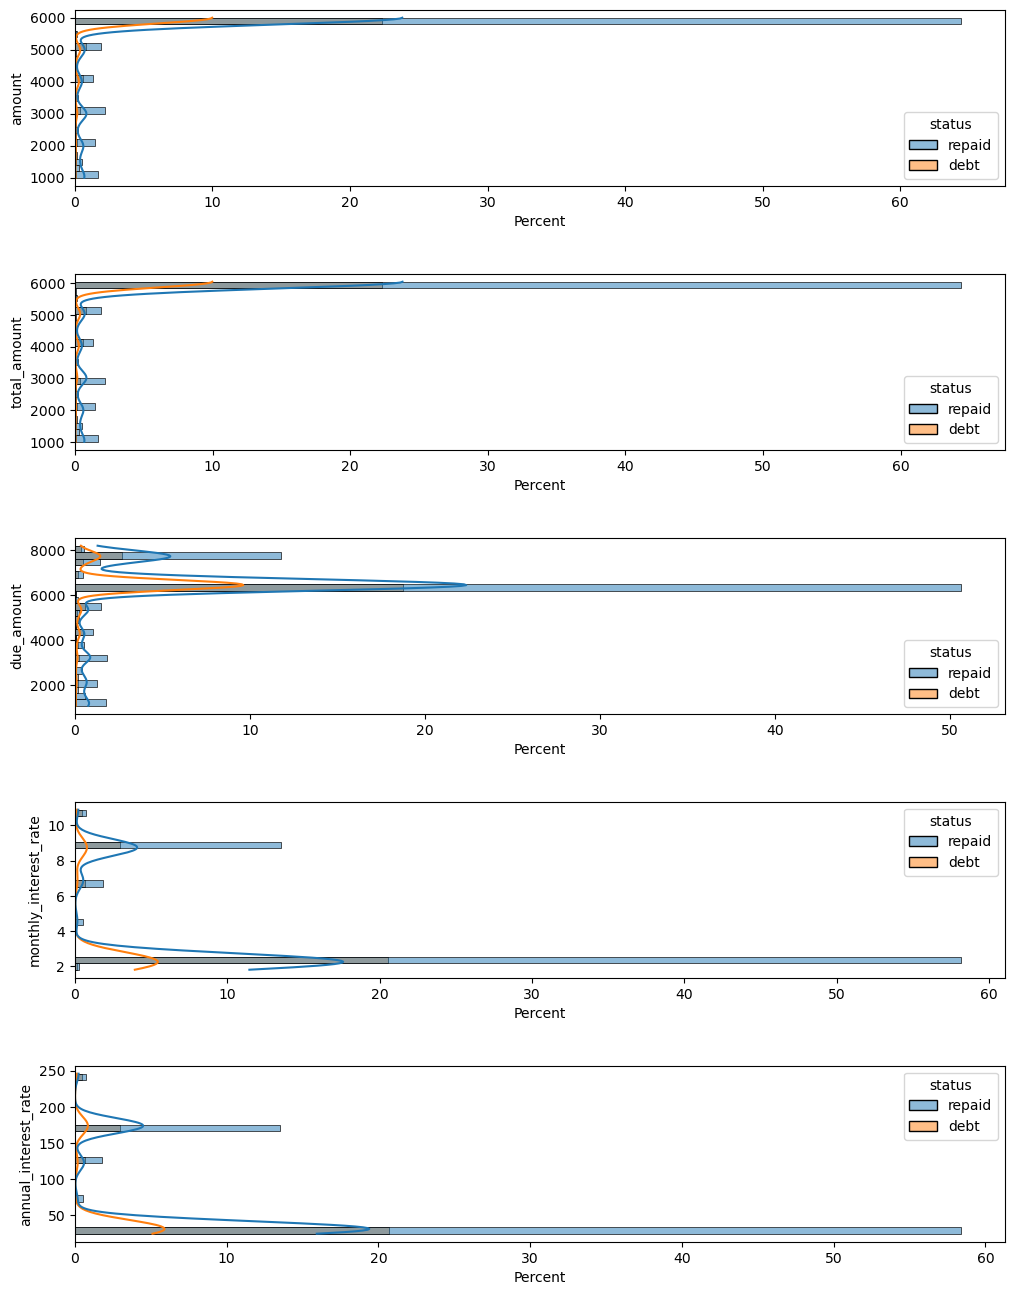

In [28]:
VARIABLES = ["amount", "total_amount", "due_amount", "monthly_interest_rate", "annual_interest_rate"]
fig, axes = plt.subplots(len(VARIABLES),1,figsize=(12,16),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(VARIABLES,axes):
    sns.histplot(data=df_analysis,y=col,stat="percent",hue="status",ax=ax,bins=25,kde=True)

### 4.2 -Veriyfing transactions 

In [29]:
all_trans_feats = [col for col in NUM_CONTIN if (col.__contains__("transactions") or col.__contains__("payment_method_credit") or (col.__contains__("payment_method_debit")))]
trans_at_created_loan = [col for col in all_trans_feats if col.__contains__("at_created_loan")]
trans_in_last_month = [col for col in all_trans_feats if col.__contains__("in_last_month")]
trans_in_last_three_mts = [col for col in all_trans_feats if col.__contains__("in_last_three_months")]
trans_in_last_six_mts = [col for col in all_trans_feats if col.__contains__("in_last_six_months")]

print("variables transactions at created loan:",trans_at_created_loan)
print("variables transactions in last month:",trans_in_last_month)
print("variables transactions in last three months:",trans_in_last_three_mts)
print("variables transactions in last six months:",trans_in_last_six_mts)

variables transactions at created loan: ['sum_amt_transactions_at_created_loan', 'sum_amt_payment_method_credit_at_created_loan', 'sum_amt_payment_method_debit_at_created_loan', 'sum_amt_transactions_in_visa_at_created_loan', 'sum_amt_transactions_in_mastercard_at_created_loan', 'sum_amt_transactions_in_elo_at_created_loan', 'max_amt_transactions_at_created_loan']
variables transactions in last month: ['sum_amt_transactions_in_last_month', 'sum_amt_payment_method_credit_in_last_month', 'sum_amt_payment_method_debit_in_last_month', 'sum_amt_transactions_in_visa_in_last_month', 'sum_amt_transactions_in_mastercard_in_last_month', 'sum_amt_transactions_in_elo_in_last_month', 'max_amt_transactions_in_last_month']
variables transactions in last three months: ['avg_amt_transactions_in_last_three_months', 'avg_amt_payment_method_credit_in_last_three_months', 'avg_amt_payment_method_debit_in_last_three_months', 'avg_amt_transactions_in_visa_in_last_three_months', 'avg_amt_transactions_in_master

#### 4.2.1 - Verifying transactions at created loan

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

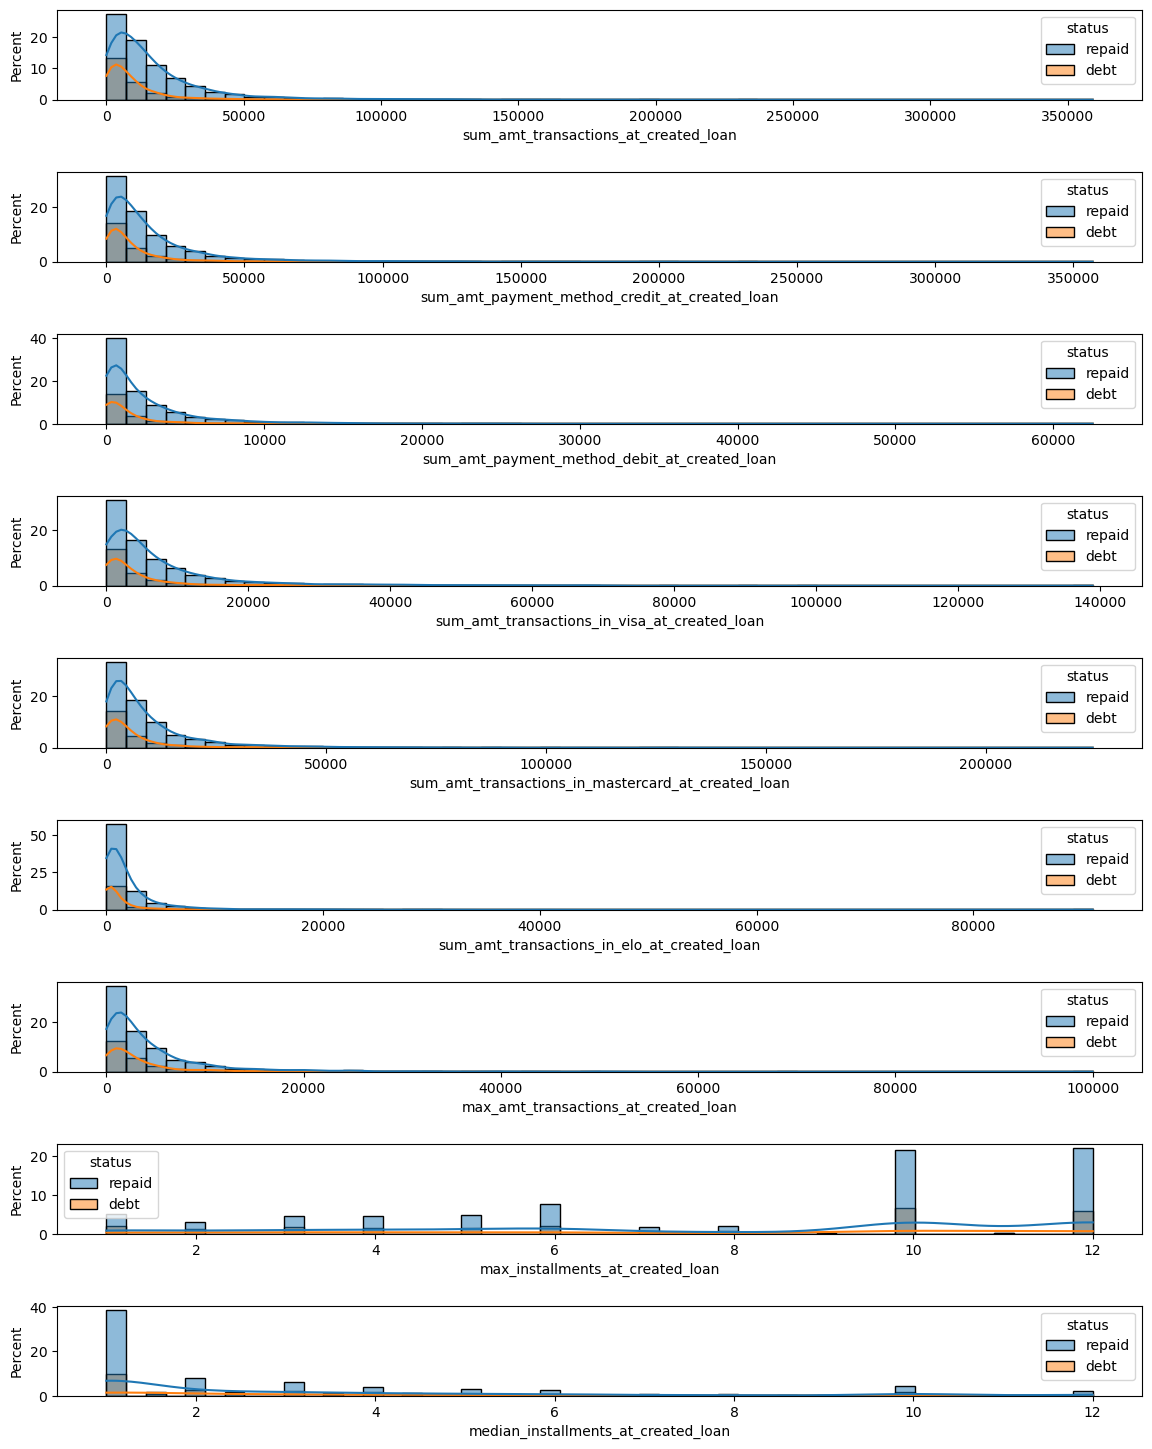

In [30]:
ADD_COLS = ['max_installments_at_created_loan','median_installments_at_created_loan']
trans_at_created_loan = trans_at_created_loan + ADD_COLS
fig, axes = plt.subplots(len(trans_at_created_loan),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.8})
for col,ax in zip(trans_at_created_loan,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=50,kde=True)

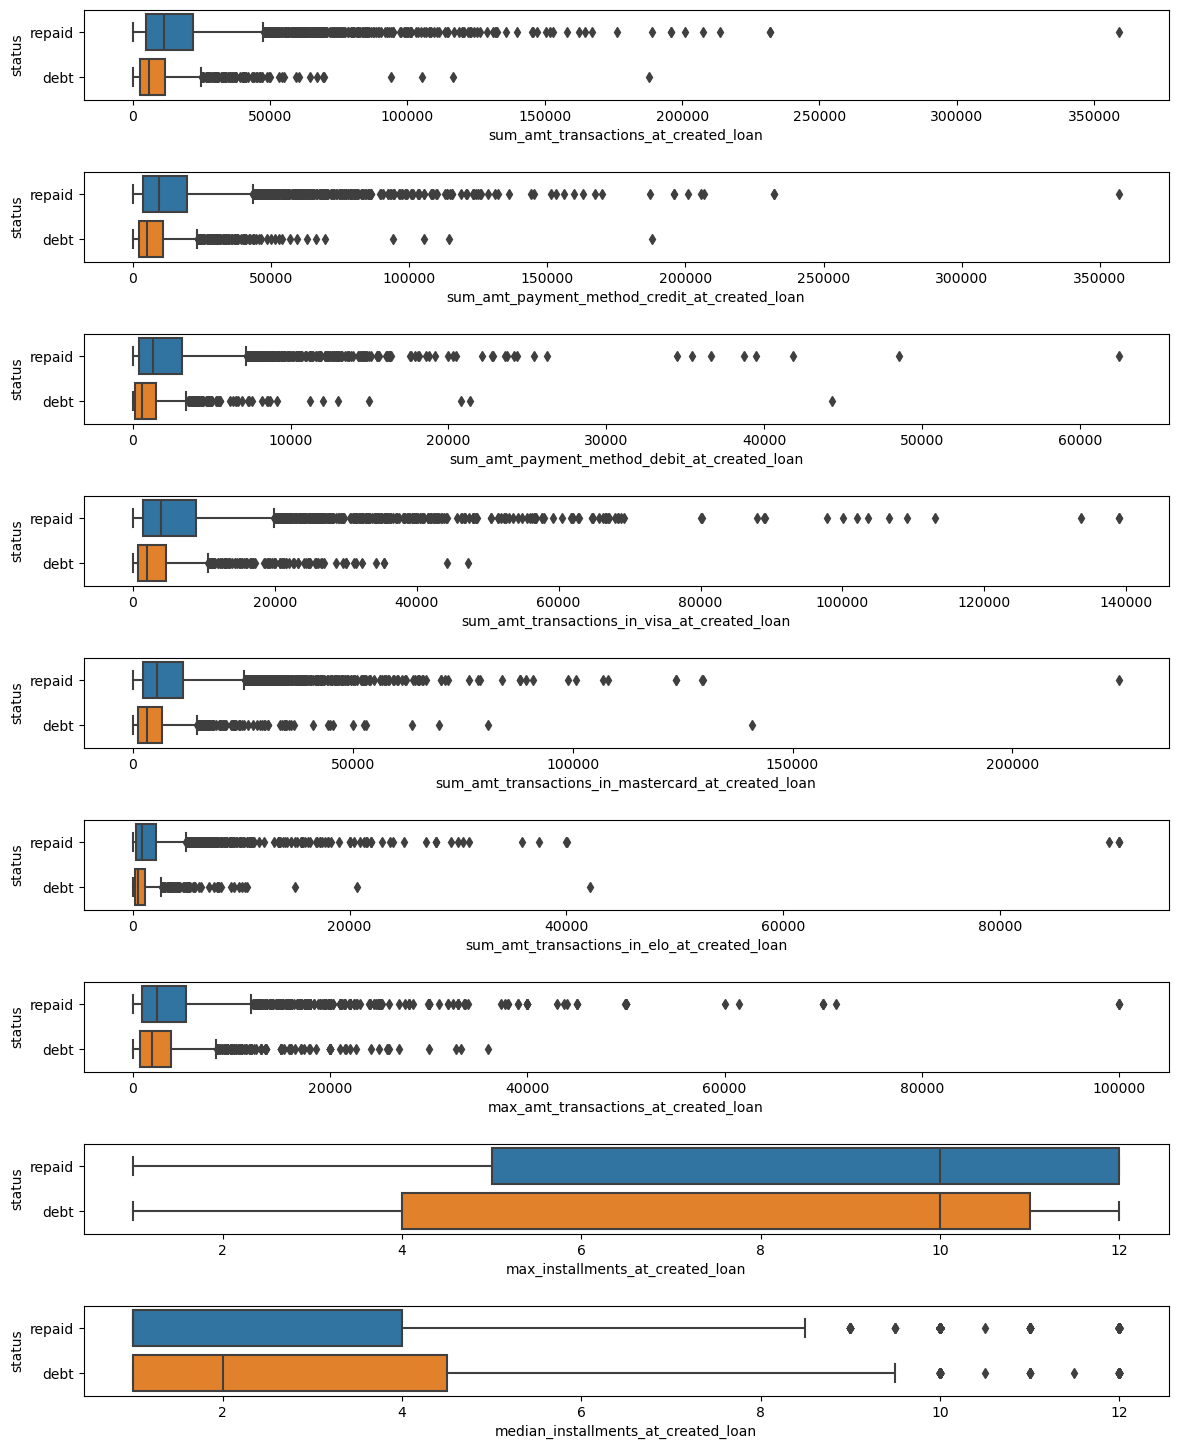

In [31]:
fig, axes = plt.subplots(len(trans_at_created_loan),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.8})
for col,ax in zip(trans_at_created_loan,axes):
    sns.boxplot(data=df_analysis,x=col,y="status",ax=ax)

#### 4.2.2 - Veryfing transactions in last month

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

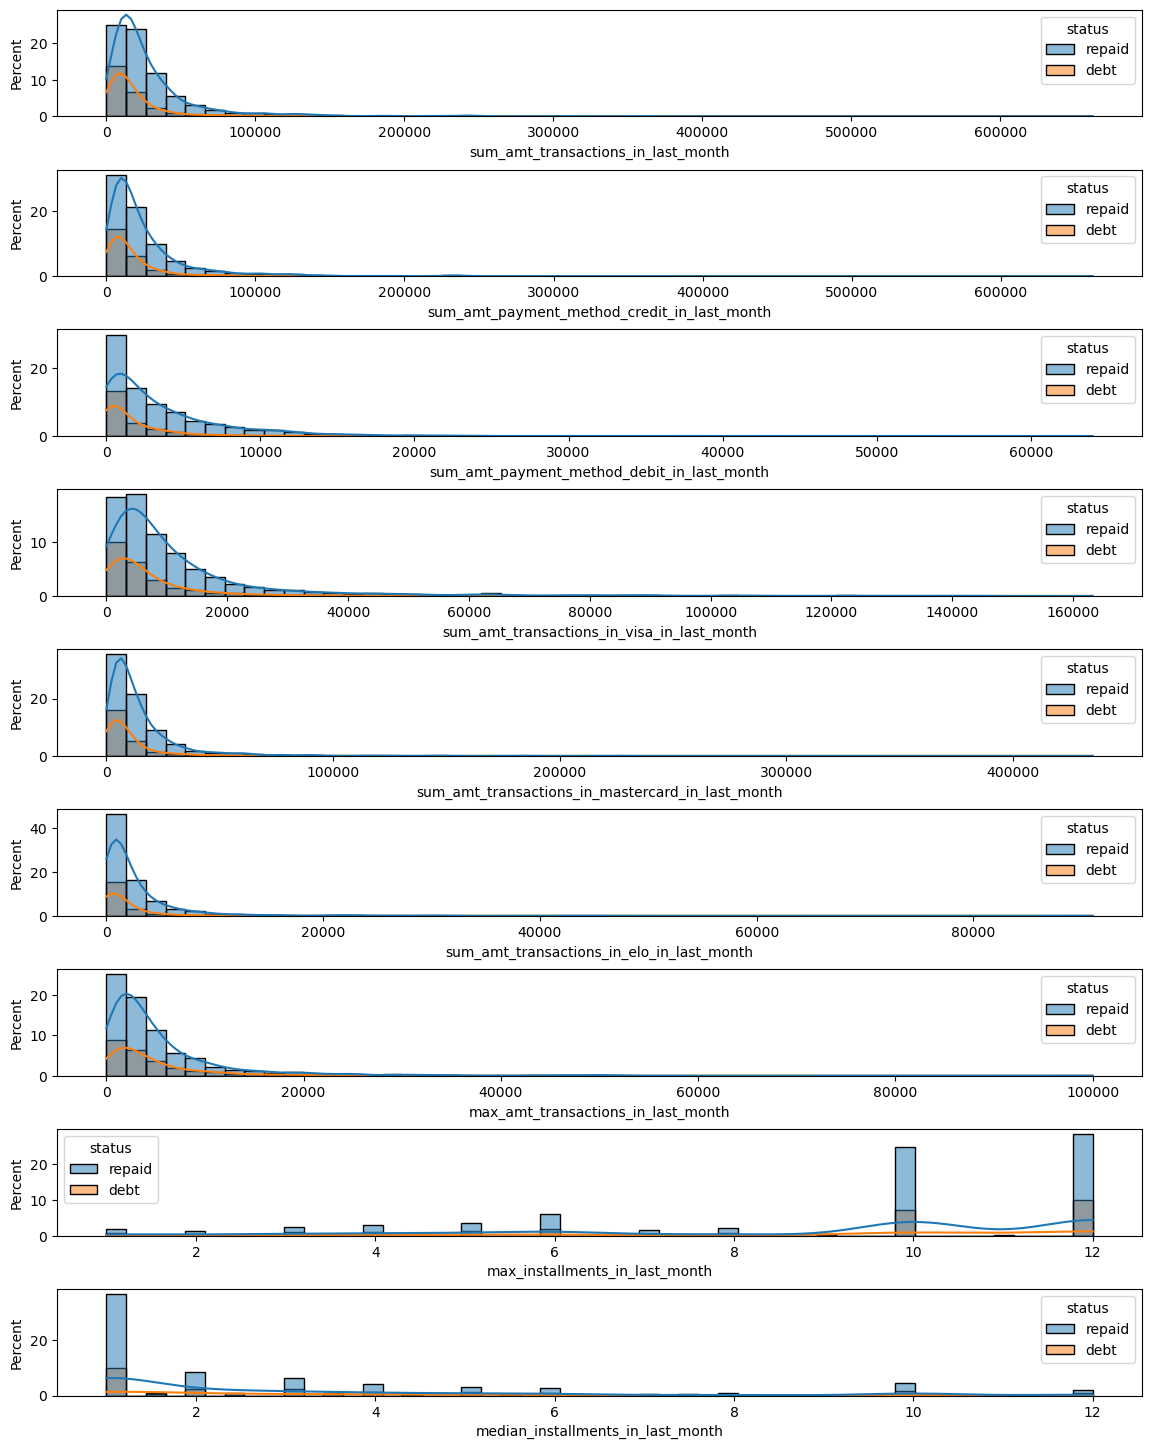

In [32]:
ADD_COLS = ['max_installments_in_last_month','median_installments_in_last_month']
trans_in_last_month = trans_in_last_month + ADD_COLS
fig, axes = plt.subplots(len(trans_in_last_month),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_month,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=50,kde=True)

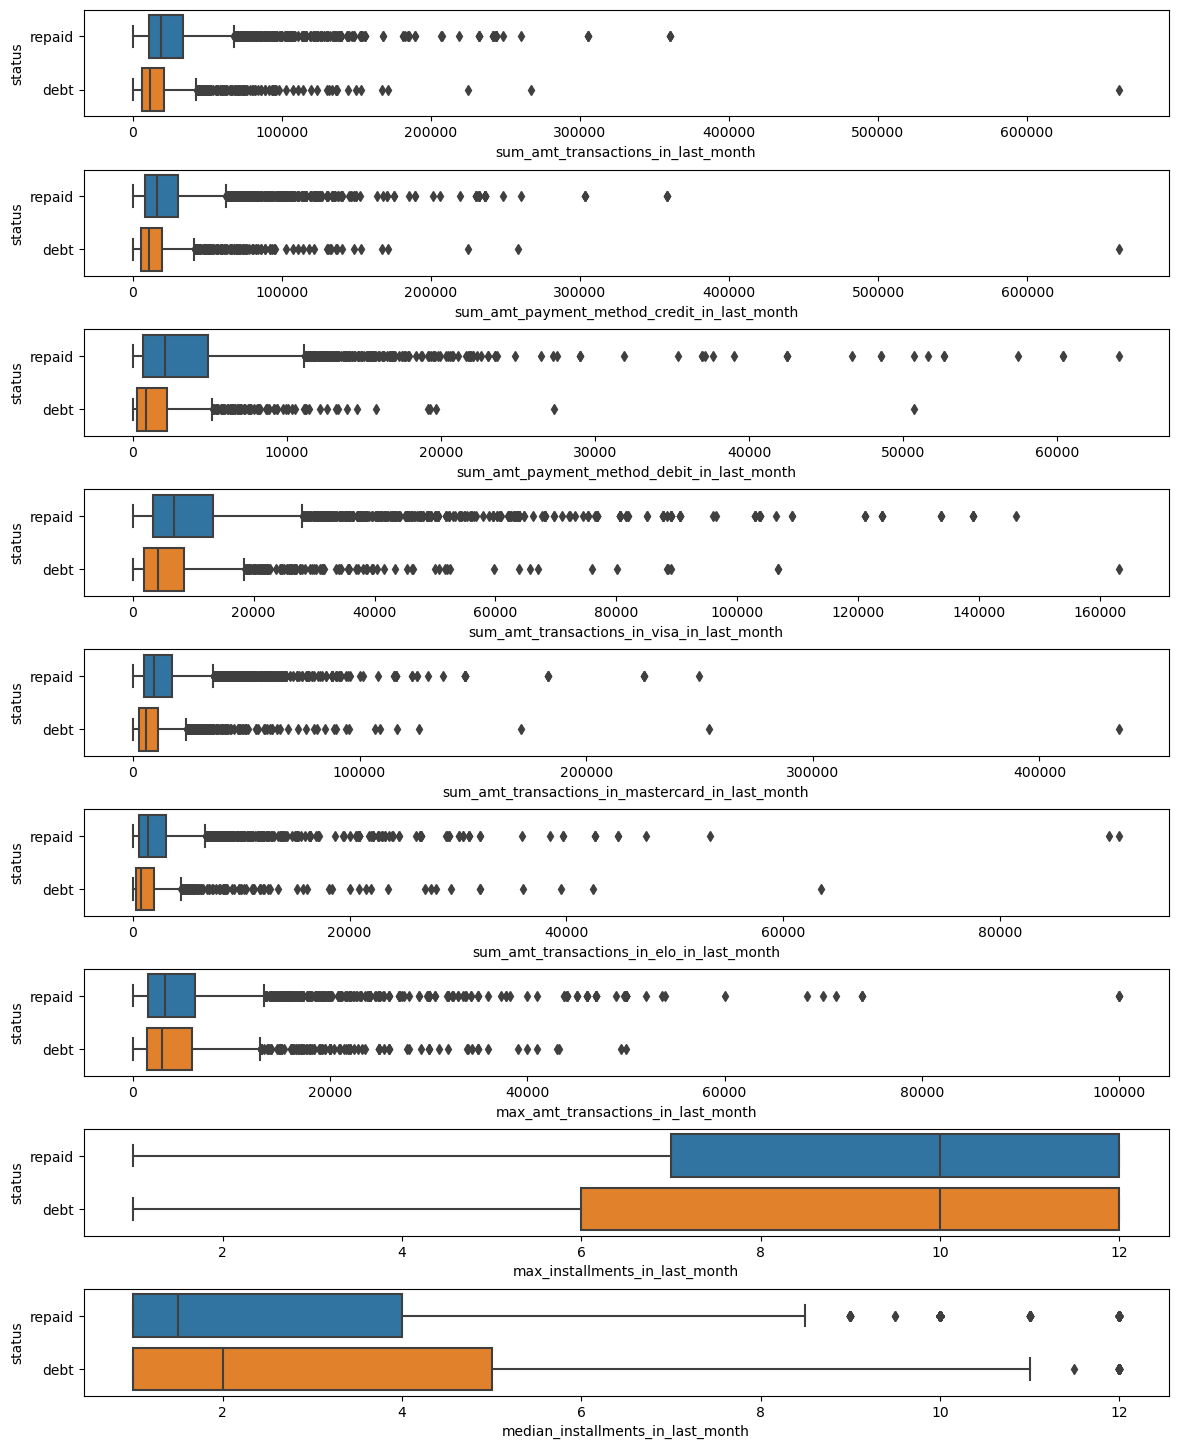

In [33]:
fig, axes = plt.subplots(len(trans_in_last_month),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_month,axes):
    sns.boxplot(data=df_analysis,x=col,y="status",ax=ax)

#### 4.2.3 - Veryfing transactions in last three months

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

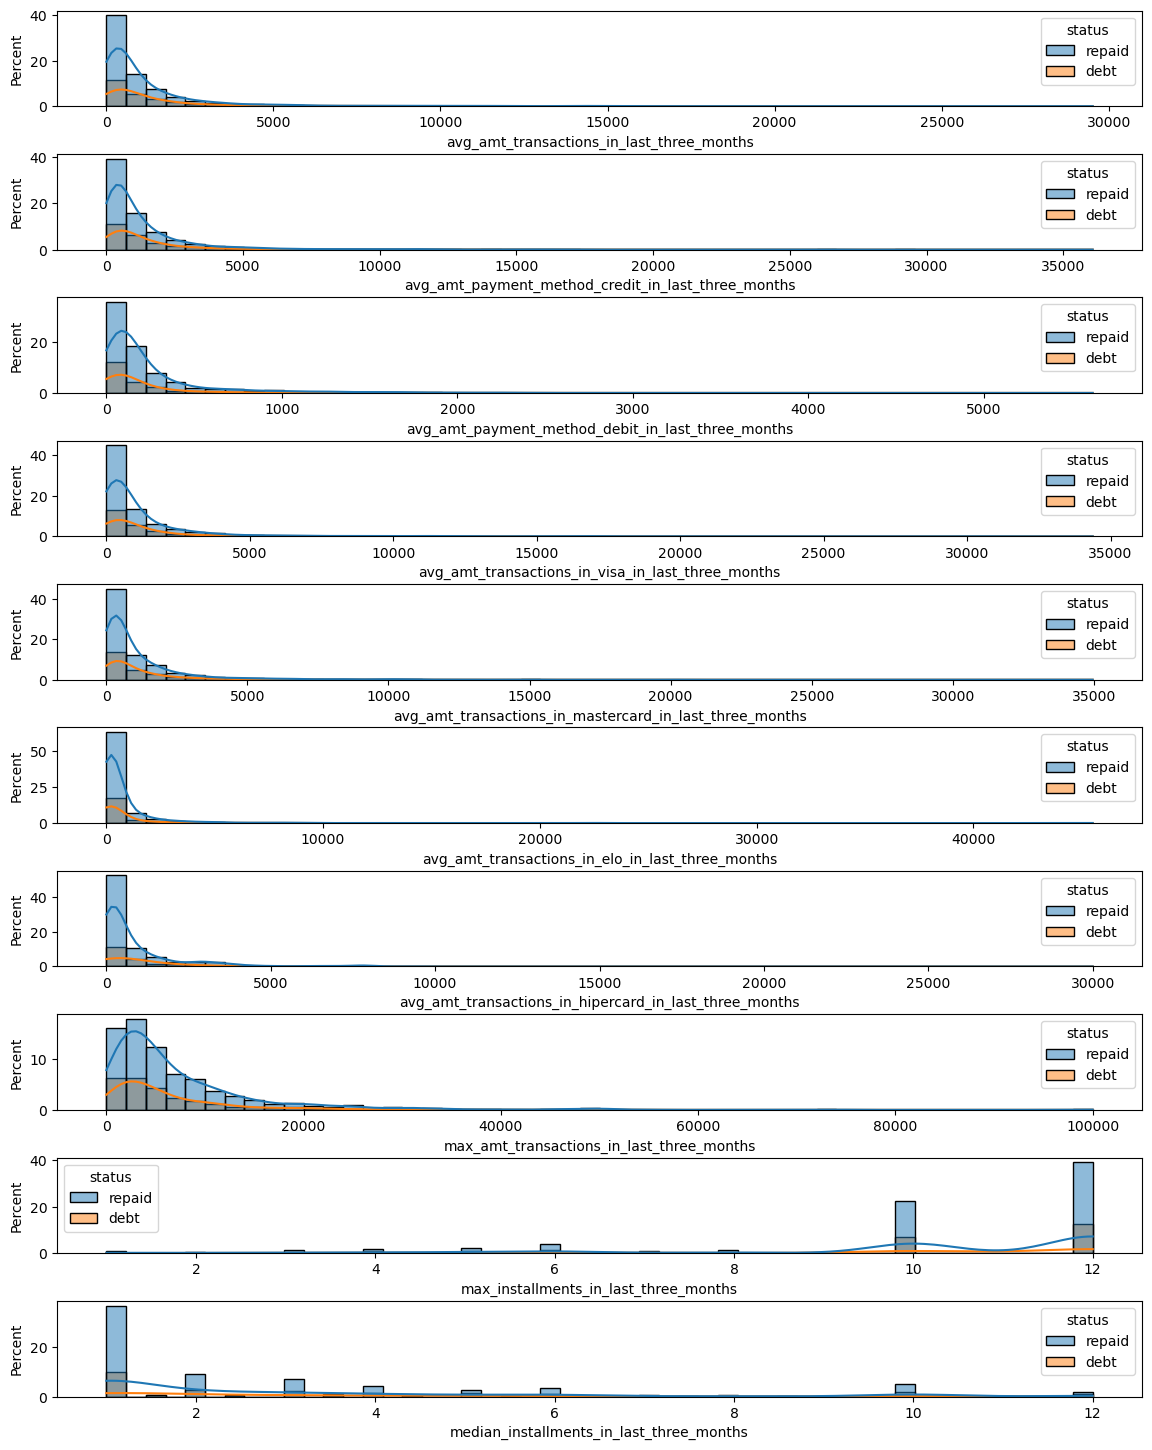

In [34]:
ADD_COLS = ['max_installments_in_last_three_months','median_installments_in_last_three_months']
trans_in_last_three_months = trans_in_last_three_mts + ADD_COLS
fig, axes = plt.subplots(len(trans_in_last_three_months),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_three_months,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=50,kde=True)

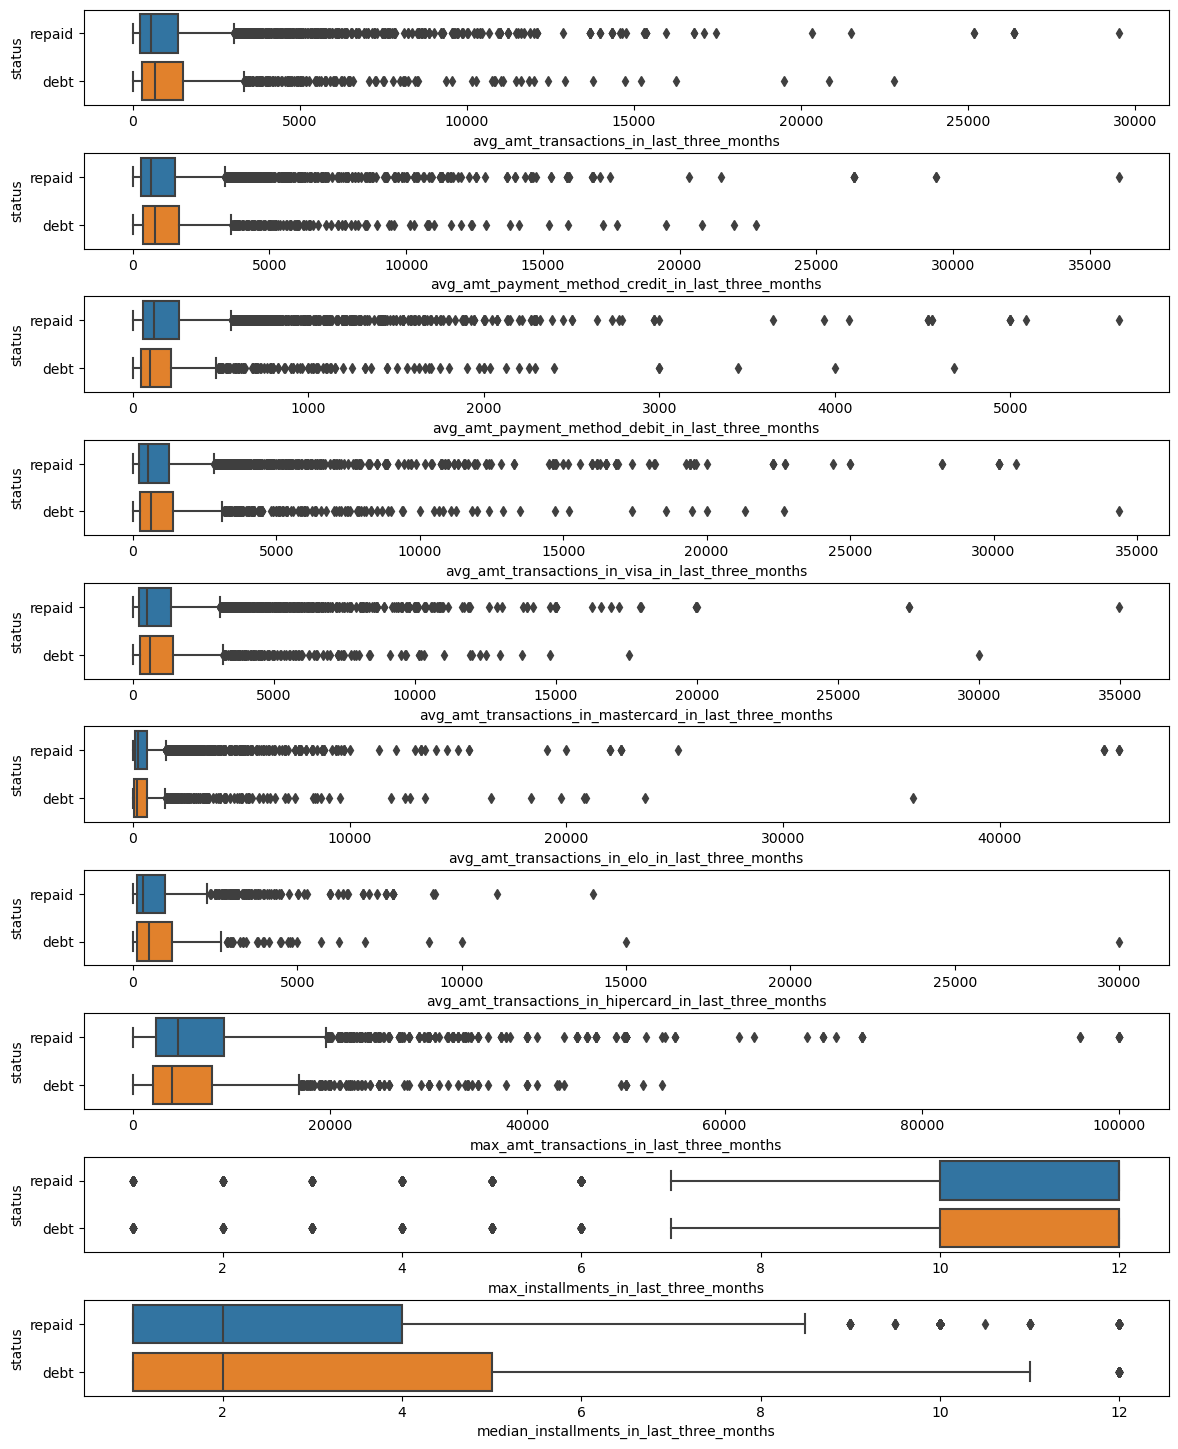

In [35]:
fig, axes = plt.subplots(len(trans_in_last_three_months),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_three_months,axes):
    sns.boxplot(data=df_analysis,x=col,y="status",ax=ax)

#### 4.2.4 - Veryfing transactions in last six months

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

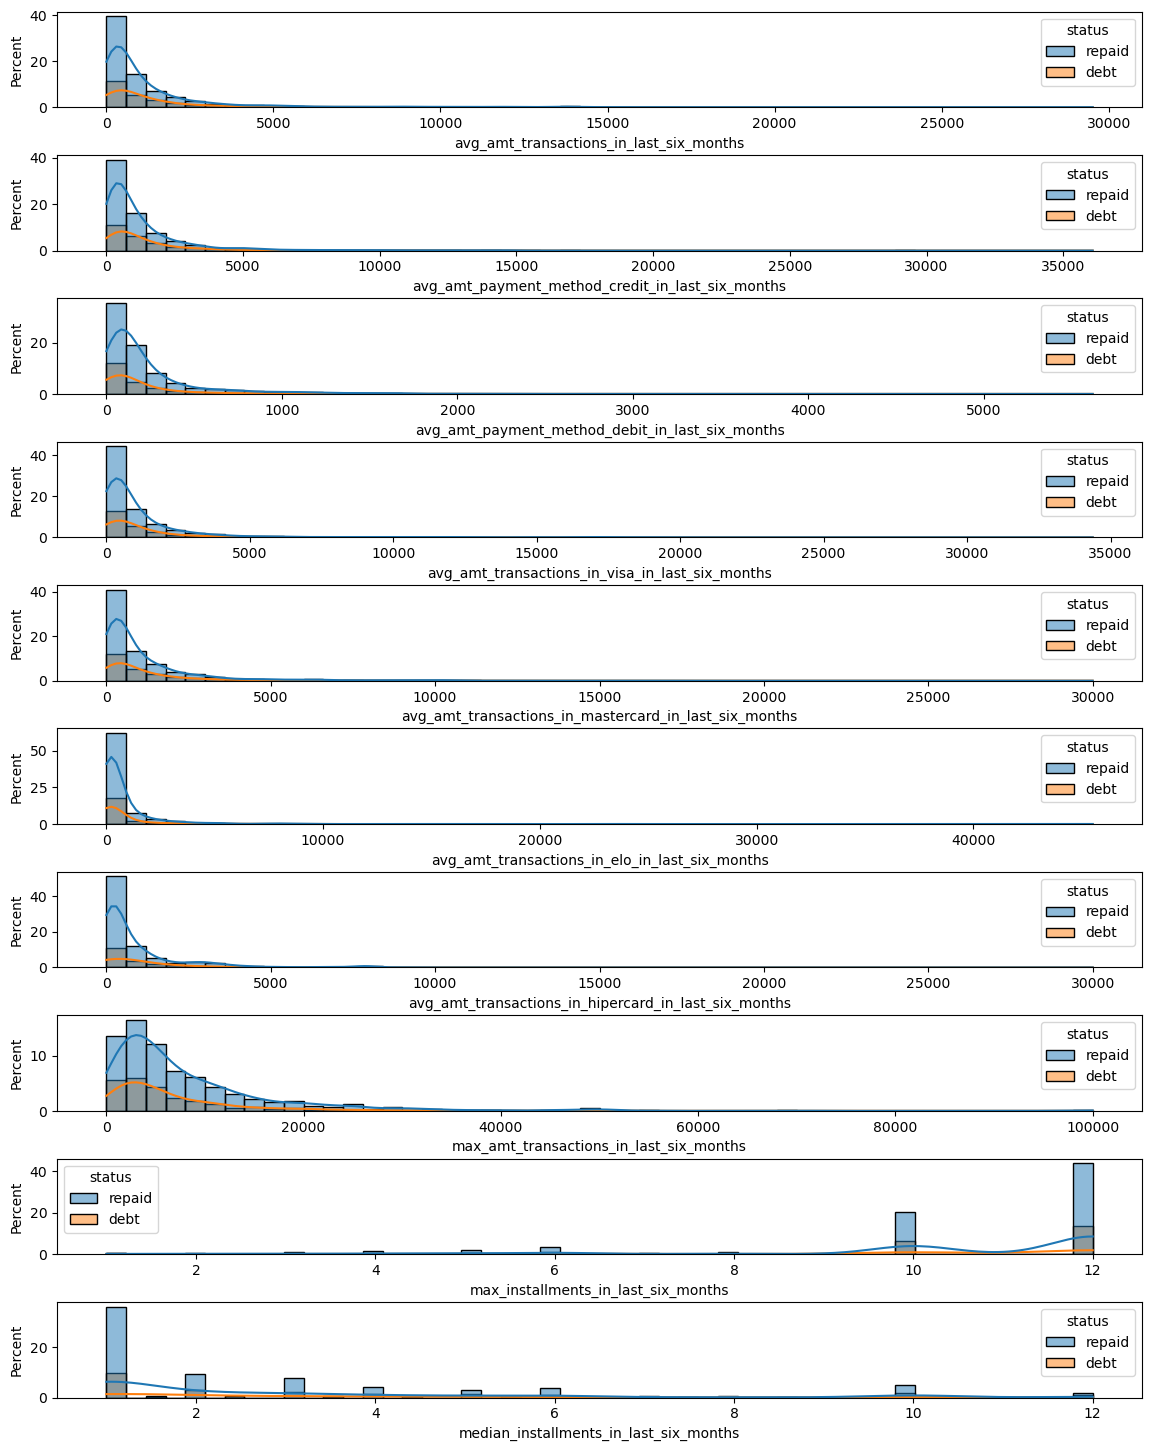

In [36]:
ADD_COLS = ['max_installments_in_last_six_months','median_installments_in_last_six_months']
trans_in_last_six_months = trans_in_last_six_mts + ADD_COLS
fig, axes = plt.subplots(len(trans_in_last_six_months),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_six_months,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=50,kde=True)

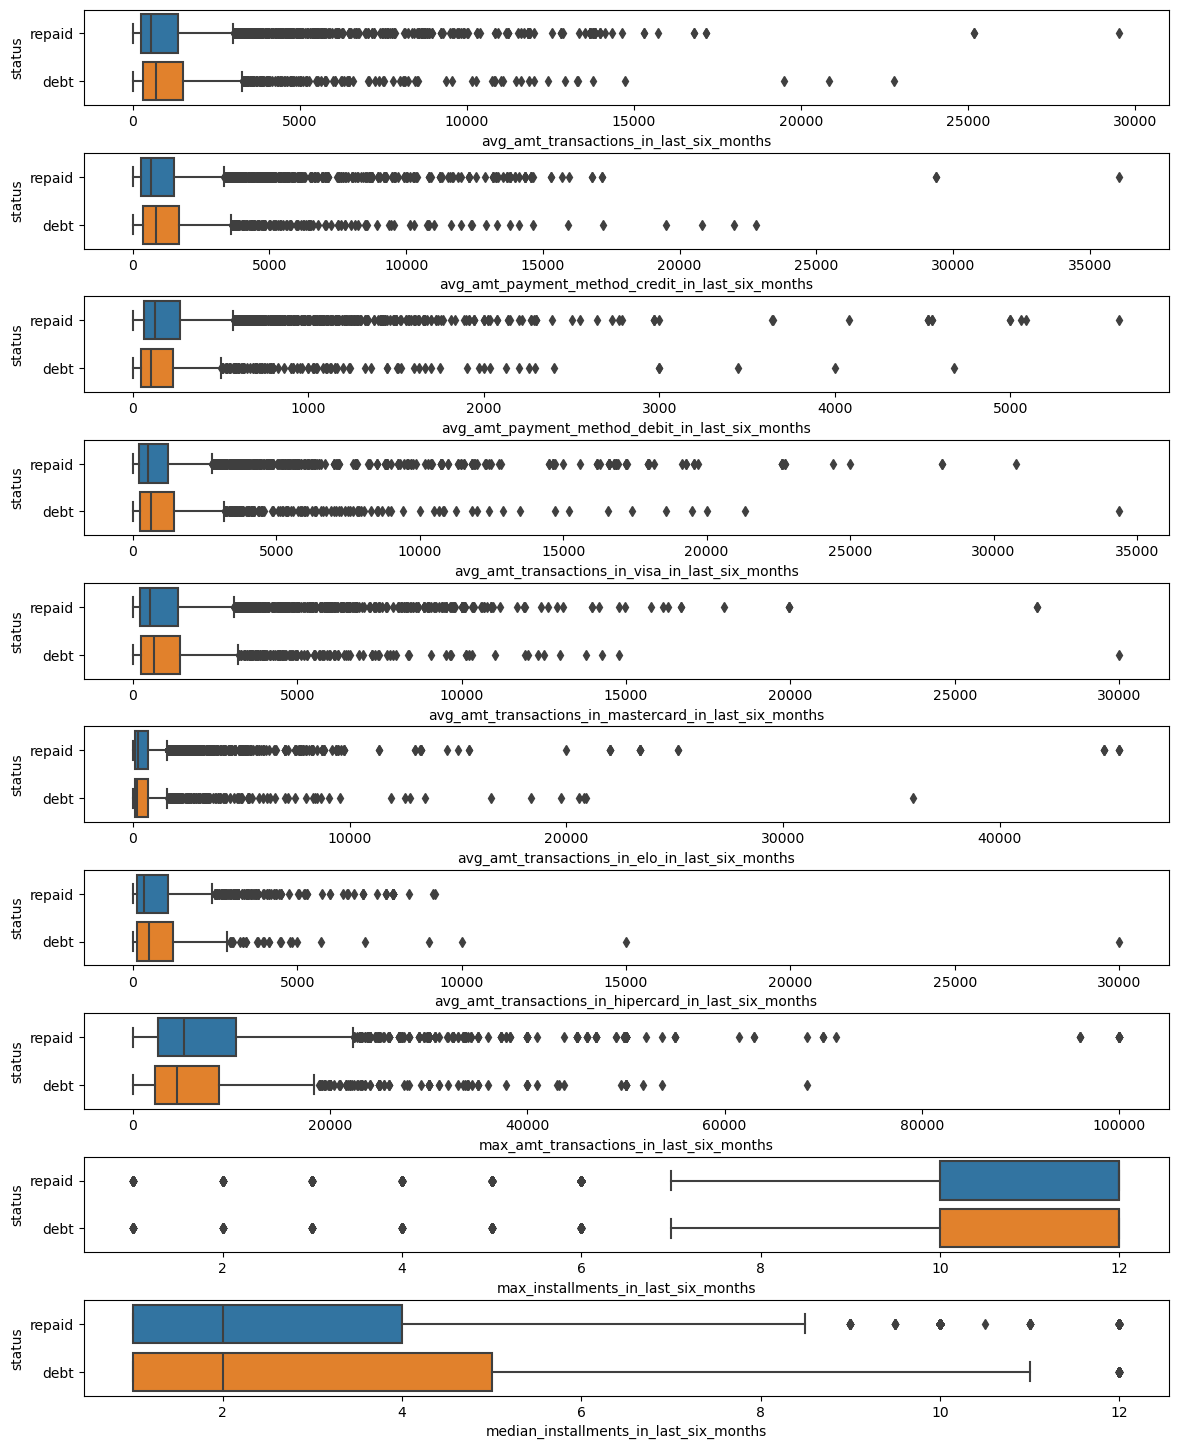

In [37]:
fig, axes = plt.subplots(len(trans_in_last_six_months),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(trans_in_last_six_months,axes):
    sns.boxplot(data=df_analysis,x=col,y="status",ax=ax)

### 4.3 - Veryfing loans repayments history

In [38]:
all_loans_repay_feats = [col for col in NUM_CONTIN if col.__contains__("repaid")]
loans_repay_at_created_loan = [col for col in all_loans_repay_feats if col.__contains__("at_created_loan")]
loans_repay_in_last_month = [col for col in all_loans_repay_feats if col.__contains__("in_last_month")]
loans_repay_in_last_three_mts = [col for col in all_loans_repay_feats if col.__contains__("in_last_three_months")]
loans_repay_in_last_six_mts = [col for col in all_loans_repay_feats if col.__contains__("in_last_six_months")]

print("variables loans repayment at created loan:",loans_repay_at_created_loan)
print("variables loans repayment in last month:",loans_repay_in_last_month)
print("variables loans repayment in last three months:",loans_repay_in_last_three_mts)
print("variables loans repayment in last six months:",loans_repay_in_last_six_mts)

variables loans repayment at created loan: []
variables loans repayment in last month: ['avg_repaid_total_amt_loans_in_last_month', 'avg_pct_repaid_first_month_loans_in_last_month', 'avg_pct_repaid_sec_month_loans_in_last_month', 'avg_pct_repaid_trd_month_loans_in_last_month', 'max_repaid_total_amt_loans_in_last_month', 'pct_repaid_loans_in_last_month']
variables loans repayment in last three months: ['avg_repaid_total_amt_loans_in_last_three_months', 'avg_pct_repaid_first_month_loans_in_last_three_months', 'avg_pct_repaid_sec_month_loans_in_last_three_months', 'avg_pct_repaid_trd_month_loans_in_last_three_months', 'max_repaid_total_amt_loans_in_last_three_months', 'pct_repaid_loans_in_last_three_months']
variables loans repayment in last six months: ['avg_repaid_total_amt_loans_in_last_six_months', 'avg_pct_repaid_first_month_loans_in_last_six_months', 'avg_pct_repaid_sec_month_loans_in_last_six_months', 'avg_pct_repaid_trd_month_loans_in_last_six_months', 'max_repaid_total_amt_loans_

#### 4.3.1 - Veryfing loans repayment history in last month

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

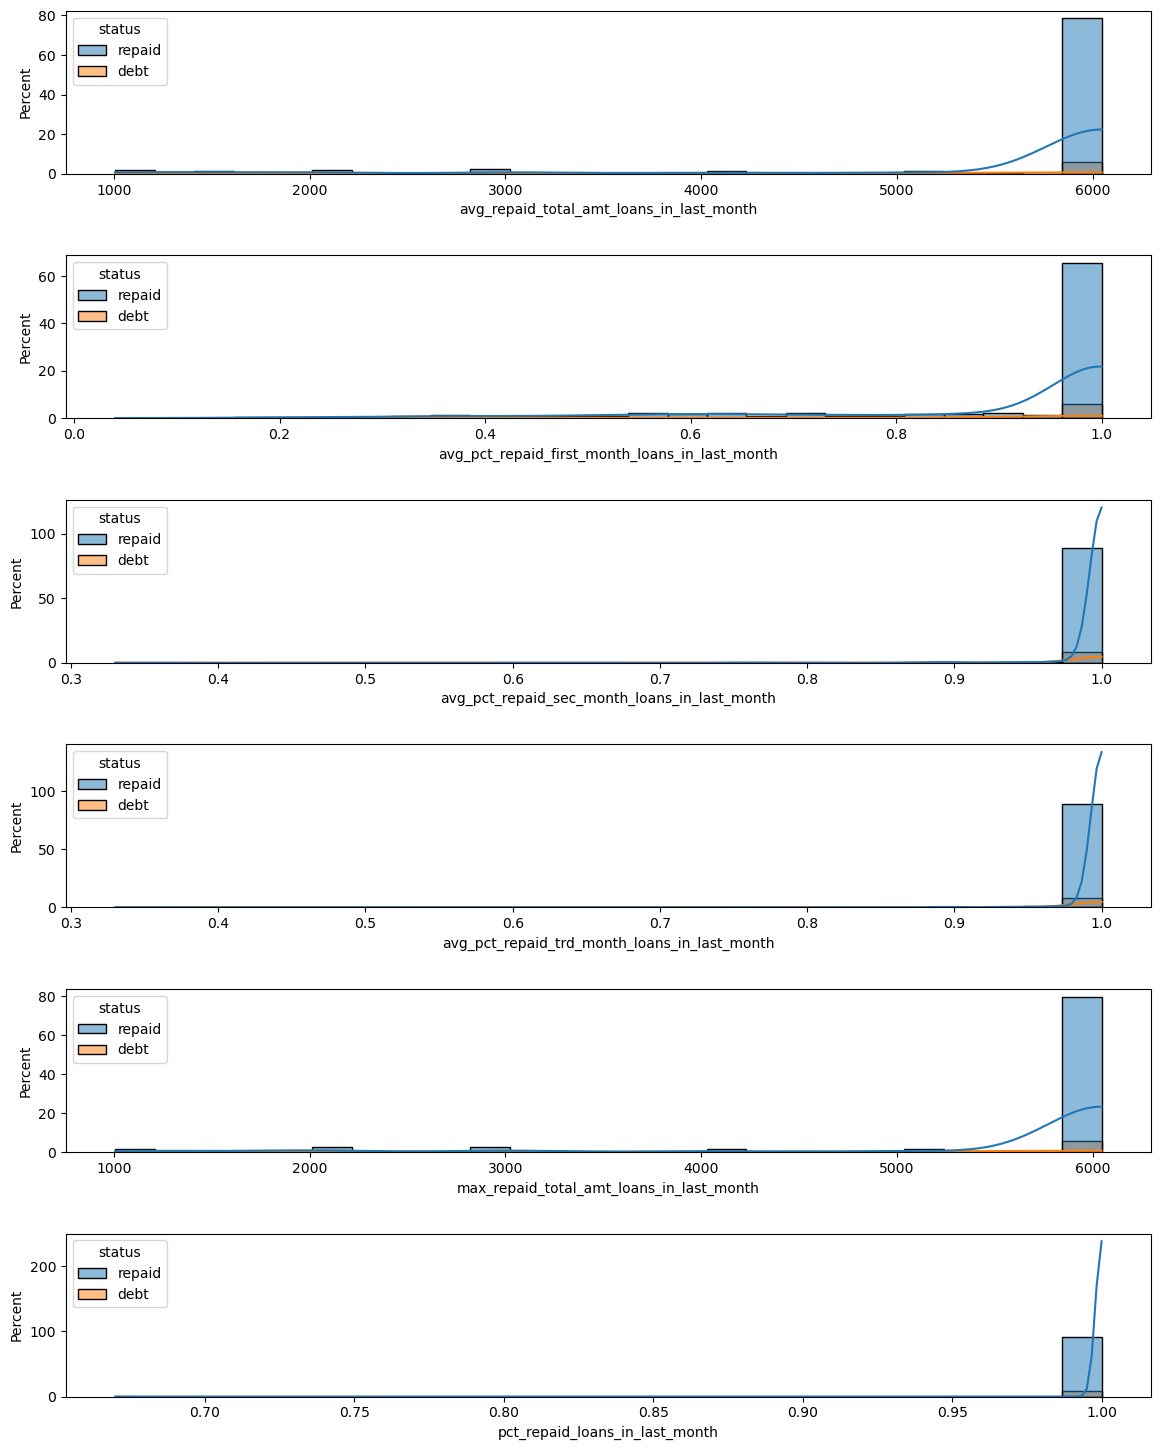

In [39]:
fig, axes = plt.subplots(len(loans_repay_in_last_month),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(loans_repay_in_last_month,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=25,kde=True)

In [40]:
df_analysis[loans_repay_in_last_month].describe()

,avg_repaid_total_amt_loans_in_last_month,avg_pct_repaid_first_month_loans_in_last_month,avg_pct_repaid_sec_month_loans_in_last_month,avg_pct_repaid_trd_month_loans_in_last_month,max_repaid_total_amt_loans_in_last_month,pct_repaid_loans_in_last_month
count,1590.000000,1586.000000,1588.000000,1588.000000,1590.000000,1590.000000
mean,5530.584340,0.891917,0.995699,0.996366,5561.497182,0.999792
std,1316.595403,0.203896,0.035476,0.032675,1288.659195,0.008276
min,1007.550000,0.040000,0.330000,0.330000,1007.550000,0.670000
25%,6045.280000,0.890000,1.000000,1.000000,6045.280000,1.000000
50%,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000
75%,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000
max,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000


#### 4.3.2 - Veryfing loans repayment history in last three months

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

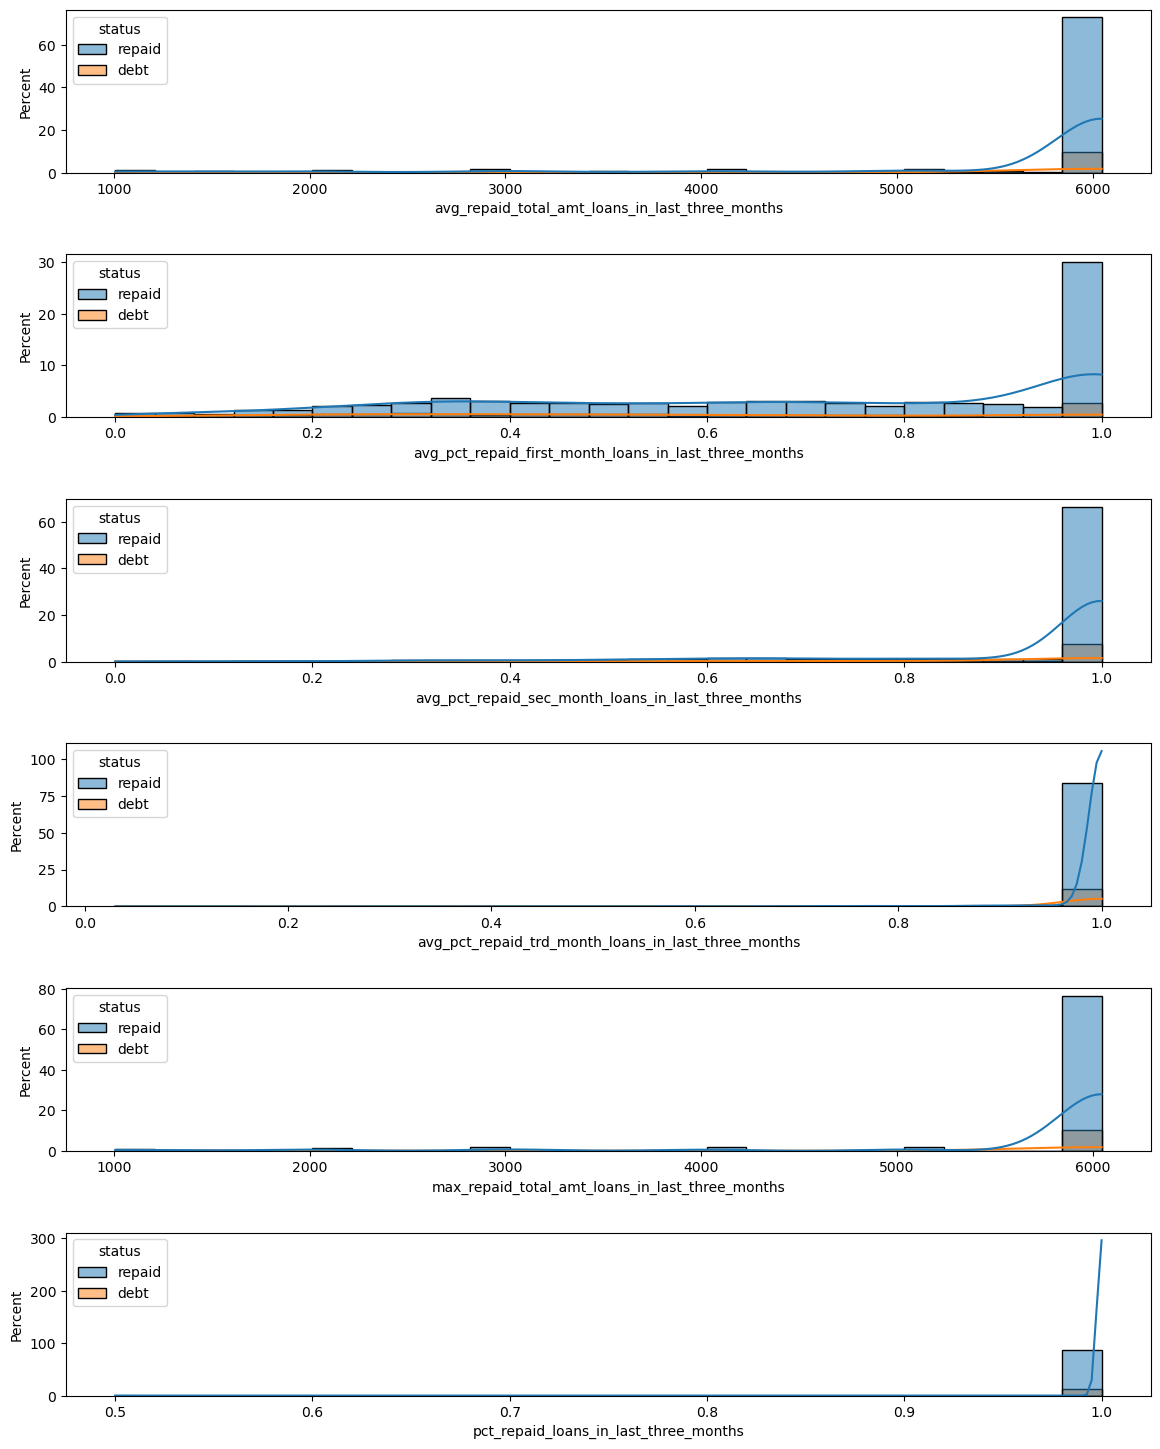

In [41]:
fig, axes = plt.subplots(len(loans_repay_in_last_three_mts),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(loans_repay_in_last_three_mts,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=25,kde=True)

In [42]:
df_analysis[loans_repay_in_last_three_mts].describe()

,avg_repaid_total_amt_loans_in_last_three_months,avg_pct_repaid_first_month_loans_in_last_three_months,avg_pct_repaid_sec_month_loans_in_last_three_months,avg_pct_repaid_trd_month_loans_in_last_three_months,max_repaid_total_amt_loans_in_last_three_months,pct_repaid_loans_in_last_three_months
count,3173.000000,3143.000000,3163.000000,3171.000000,3173.000000,3173.000000
mean,5580.654151,0.670423,0.896045,0.988597,5649.462635,0.999738
std,1191.512228,0.303383,0.210229,0.071120,1138.532386,0.010634
min,1007.550000,0.000000,0.000000,0.030000,1007.550000,0.500000
25%,6045.280000,0.400000,0.930000,1.000000,6045.280000,1.000000
50%,6045.280000,0.710000,1.000000,1.000000,6045.280000,1.000000
75%,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000
max,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000


#### 4.3.3 - Veryfing loans repayment history in last six months

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

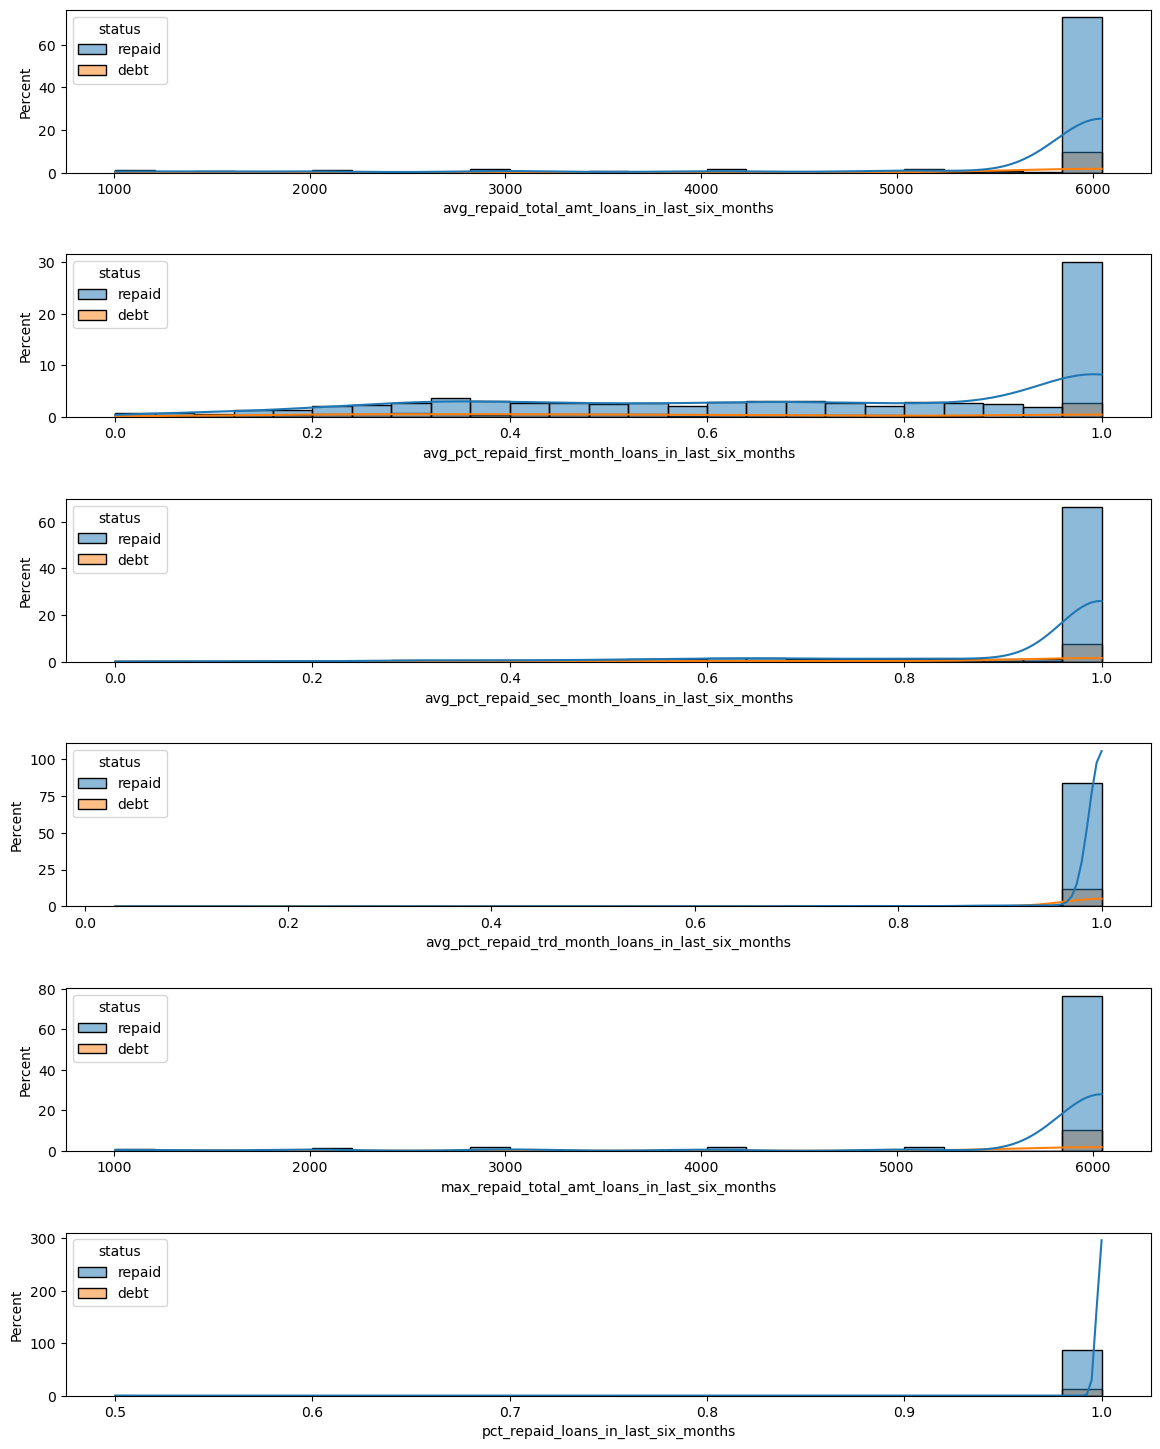

In [43]:
fig, axes = plt.subplots(len(loans_repay_in_last_six_mts),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(loans_repay_in_last_six_mts,axes):
    sns.histplot(data=df_analysis,x=col,stat="percent",hue="status",ax=ax,bins=25,kde=True)

In [44]:
df_analysis[loans_repay_in_last_six_mts].describe()

,avg_repaid_total_amt_loans_in_last_six_months,avg_pct_repaid_first_month_loans_in_last_six_months,avg_pct_repaid_sec_month_loans_in_last_six_months,avg_pct_repaid_trd_month_loans_in_last_six_months,max_repaid_total_amt_loans_in_last_six_months,pct_repaid_loans_in_last_six_months
count,3173.000000,3143.000000,3163.000000,3171.000000,3173.000000,3173.000000
mean,5580.654151,0.670423,0.896045,0.988597,5649.462635,0.999738
std,1191.512228,0.303383,0.210229,0.071120,1138.532386,0.010634
min,1007.550000,0.000000,0.000000,0.030000,1007.550000,0.500000
25%,6045.280000,0.400000,0.930000,1.000000,6045.280000,1.000000
50%,6045.280000,0.710000,1.000000,1.000000,6045.280000,1.000000
75%,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000
max,6045.280000,1.000000,1.000000,1.000000,6045.280000,1.000000


### 4.4 - Most frequent features

In [45]:
all_most_frequent_feats = [col for col in df_analysis.columns if col.__contains__("most_frequent")]
all_most_frequent_feats

['most_frequent_transactions_payment_method_at_created_loan',
 'most_frequent_transactions_payment_method_in_last_month',
 'most_frequent_transactions_payment_method_in_last_three_months',
 'most_frequent_transactions_payment_method_in_last_six_months',
 'most_frequent_loans_repayment_method_in_last_month',
 'most_frequent_loans_repayment_method_in_last_three_months',
 'most_frequent_loans_repayment_method_in_last_six_months']

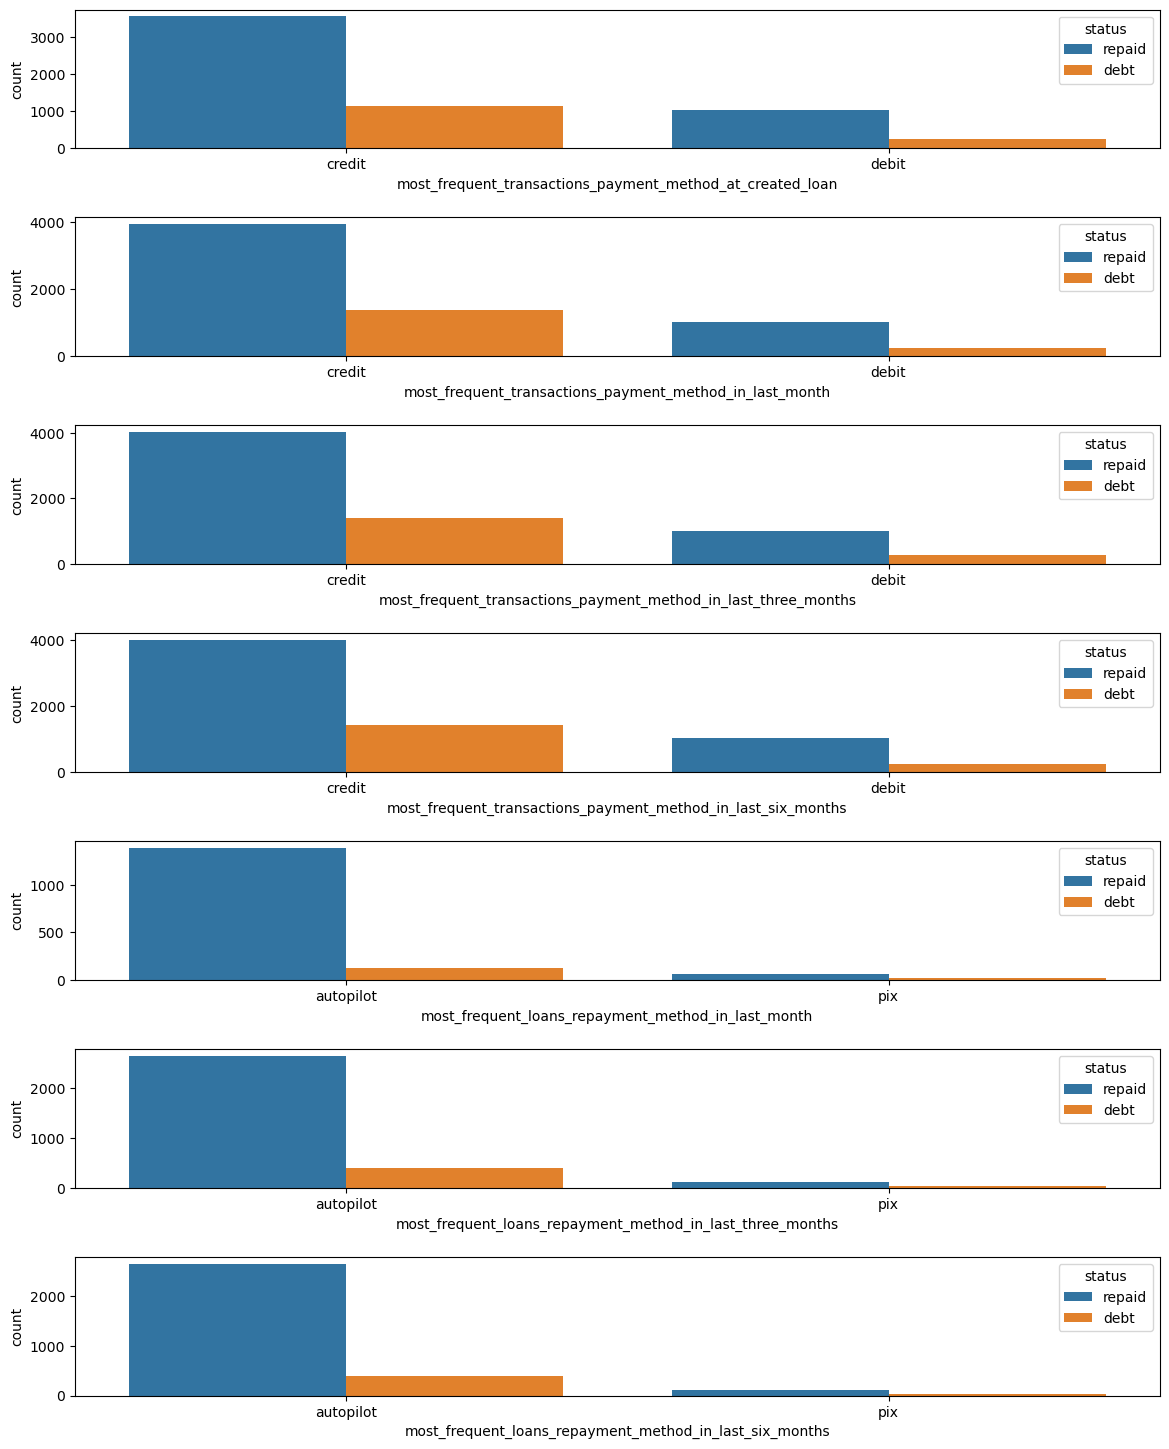

In [46]:
fig, axes = plt.subplots(len(all_most_frequent_feats),1,figsize=(14,18),gridspec_kw={"wspace":0.2,"hspace":0.5})
for col,ax in zip(all_most_frequent_feats,axes):
    sns.countplot(data=df_analysis,x=col,hue="status",ax=ax)

### 4.5 - Interest rate features

In [47]:
all_interest_rate_feats = [col for col in df_analysis.columns if col.__contains__("interest_rate")]
all_interest_rate_feats

['annual_interest_rate', 'monthly_interest_rate']

/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/miniconda3/envs/loan_pred_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/talissa/mini

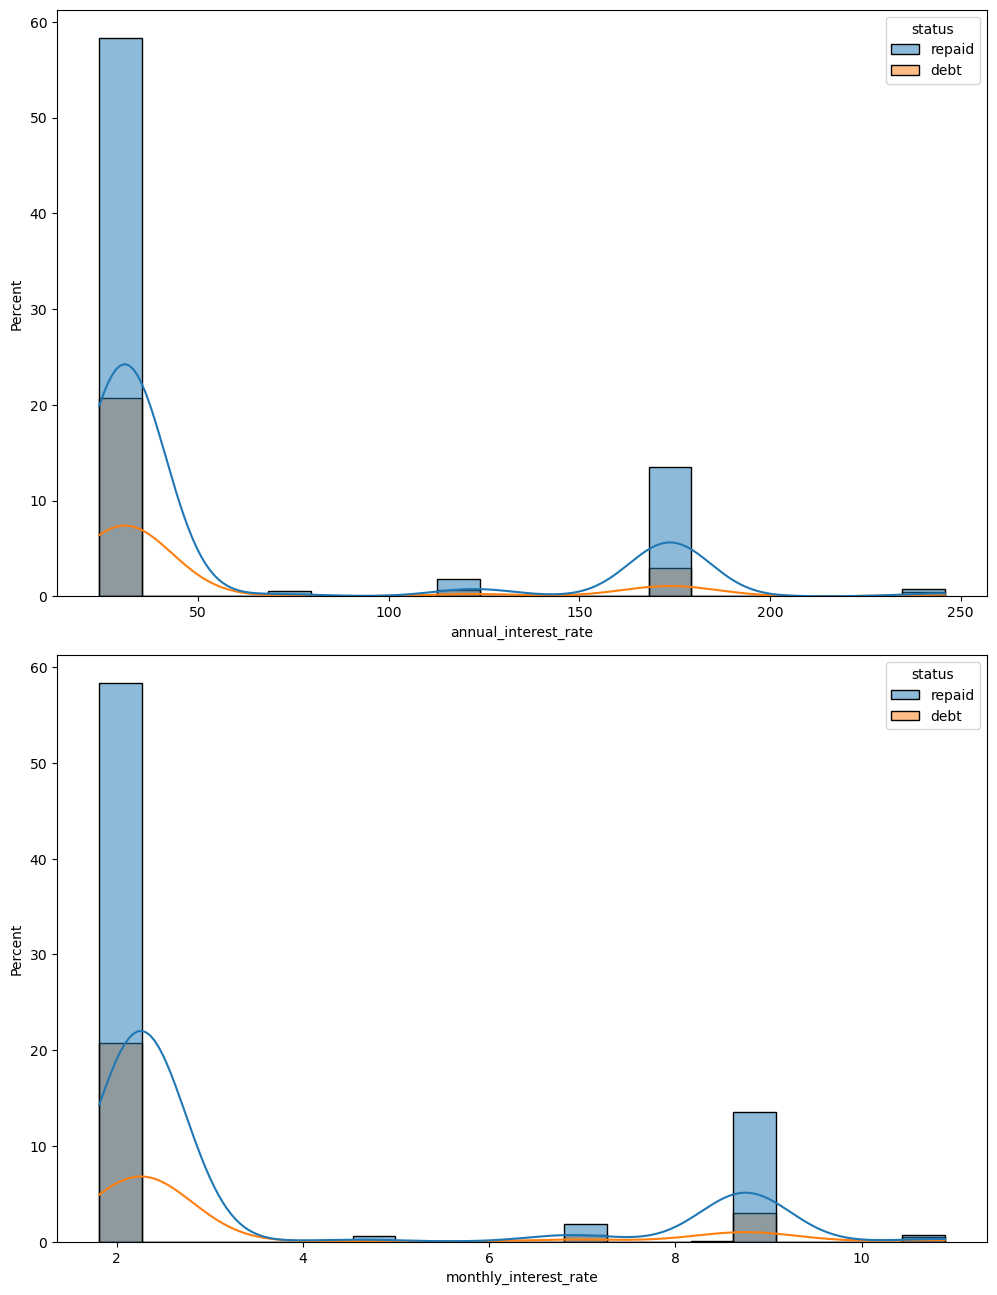

In [48]:
fig, axes = plt.subplots(len(all_interest_rate_feats),1,figsize=(12,16),gridspec_kw={"wspace":0.1,"hspace":0.1})
for col,ax in zip(all_interest_rate_feats,axes):
    sns.histplot(data=df_analysis,x=col,hue="status",stat="percent",ax=ax,bins=20,kde=True)

## 5 - Conclusion

- We can see that users tend to repay loans. The proportion of paid is higher than unpaid. 
- Users who pay and don't repay loans tend to have the same spending by analyzing their transaction history from 3 months before applying for the loan. However, when viewing the history in the month and month prior to the creation of the loan, it is seen that users who do not repay the loans tend to spend less. 
- An interesting feature to see is the median of installments. Users who don't repay their loans tend to have more installment purchases. 
- Viewing loan payment history data, we can see that good payers tend to pay a good part of the loan amount from the first installment. With many cases with the full payment of the amount requested in the second and third installment.
- By the percentages of repaid loans. Customers who have a history of repaying a loan tend to repay new loans.
- The final dataset to be used that applies the preprocessing is named `df_loans_with_loans_repays_hist_and_trans_hist_per_user_cleared` in `data\processed` and the steps are transformed into functions in the script `data_cleaning.py` at `\src\data`.